In this second part of the lab, we will implement a language identifier trained on the same data, but using Logistic Regression instead of Naive Bayes.

In [1]:
import io, sys, math
import numpy as np
from collections import defaultdict

This function is used to build the dictionary, or vocabulary, which is a mapping from strings (or words) to integers (or indices). This will allow to build vector representations of documents. 

In [2]:
def build_dict(filename, threshold=1):
    fin = io.open(filename, 'r', encoding='utf-8')
    word_dict, label_dict = {}, {}
    counts = defaultdict(lambda: 0)
    for line in fin:
        tokens = line.split()
        label = tokens[0]

        if not label in label_dict:
            label_dict[label] = len(label_dict)

        for w in tokens[1:]:
            counts[w] += 1
            
    for k, v in counts.items():
        if v > threshold:
            word_dict[k] = len(word_dict)
    return word_dict, label_dict

This function is used to load the training dataset, and build vector representations of the training examples. In particular, a document or sentence is represented as a bag of words. Each example correspond to a sparse vector ` x` of dimension `V`, where `V` is the size of the vocabulary. The element `j` of the vector `x` is the number of times the word `j` appears in the document.

In [3]:
def load_data(filename, word_dict, label_dict):
    fin = io.open(filename, 'r', encoding='utf-8')
    data = []
    dim = len(word_dict)
    for line in fin:
        tokens = line.split()
        label = tokens[0]

        yi = label_dict[label]
        xi = np.zeros(dim)
        for word in tokens[1:]:
            if word in word_dict:
                wid = word_dict[word]
                xi[wid] += 1.0
        data.append((yi, xi))
    return data

In [4]:
word_dict, label_dict = build_dict("train1.txt")

train_data = load_data("train1.txt", word_dict, label_dict)
valid_data = load_data("valid1.txt", word_dict, label_dict)

nlabels = len(label_dict)
# dim = len(word_dict)

First, let's implement the softmax function. Don't forget numerical stability!

In [5]:
def softmax(x):
    z=x-np.max(x)
    return np.exp(z) / np.sum(np.exp(z),axis=0)

Now, let's implement the main training loop, by using stochastic gradient descent. The function will iterate over the examples of the training set. For each example, we will first compute the loss, before computing the gradient and performing the update.

In [6]:

def sgd(w, data, niter):
    nlabels, dim = w.shape
    features = data[1]
    list_loss = []
    for iter in range(niter):
        ### FILL CODE
        for y,x in data:
            x = x.reshape(-1,1)
            y_enc = np.zeros([nlabels,1])
            y_enc[y,:] =1 
            loss = -np.sum(y_enc * np.log(softmax(w @ x )))
            
            w +=  (y_enc-softmax(w @ x )) @ x.T
        list_loss.append(loss)

    return w,list_loss

The next function will predict the most probable label corresponding to example `x`, given the trained classifier `w`.

In [7]:
def predict(w, x):
    ## FILL CODE
    return softmax(w@x).argmax(0)

Finally, this function will compute the accuracy of a trained classifier `w` on a validation set.

In [8]:
def compute_accuracy(w, valid_data):
    ## FILL CODE
    accuracy = 0
    for y,x in valid_data:
      pred = predict(w,x)
      accuracy += (pred == y)*1
    return accuracy/len(valid_data)

In [9]:
print("")
print("** Logistic Regression **")
print("")

word_dict, label_dict = build_dict("train1.txt")
train_data = load_data("train1.txt", word_dict, label_dict)
valid_data = load_data("valid1.txt", word_dict, label_dict)

nlabels = len(label_dict)
dim = len(word_dict)
w = np.zeros([nlabels, dim])
w,list_loss = sgd(w, train_data, 5)
print("")
print("Validation accuracy: %.3f" % compute_accuracy(w, valid_data))
print("")


** Logistic Regression **


Validation accuracy: 0.926



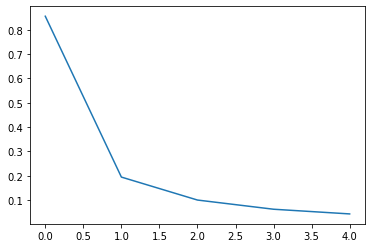

In [10]:
from matplotlib import pyplot as plt
plt.plot(list_loss)
plt.show()